This is used to do all of the imports that is required to make stuff work


In [ ]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.colors as mcolors


In [ ]:
#Get the geojson_file
geojson_fileName="pittsburgh_neighborhoods.geojson"
geojson_filepath=os.path.abspath(geojson_fileName)

In [ ]:
#Error Checking to make sure there is a file there
if not os.path.exists(geojson_filepath):
    raise FileNotFoundError(f"GeoJSON file not found: {geojson_filepath}")

# Load the GeoJSON
gdf = gpd.read_file(geojson_filepath)
print("GeoJSON loaded successfully!")

In [20]:
#Options:
#Show the neighborhood names on the map
show_labels=False

In [ ]:
##Base MAP

ax = gdf.plot(figsize=(12, 12), color='lightgray', edgecolor='black')

name_col = "hood"


if show_labels:
    for idx, row in gdf.iterrows():
        point = row.geometry.representative_point()
        label = str(row[name_col])
        plt.text(point.x, point.y, label, fontsize=7, ha='center', color='blue')

plt.title("Pittsburgh Neighborhoods Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()

**Lets grab our data**


In [ ]:
Sales_data=os.path.join(os.getcwd(),'Sales-transaction-2024-geocoded_with_neighborhood.csv')

# Try to load the data
try:
    # Load the CSV file
    df = pd.read_csv(Sales_data)
    print(f"File  loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{Sales_data}' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
grouped=df.groupby('neighborhood').size()
print(grouped)

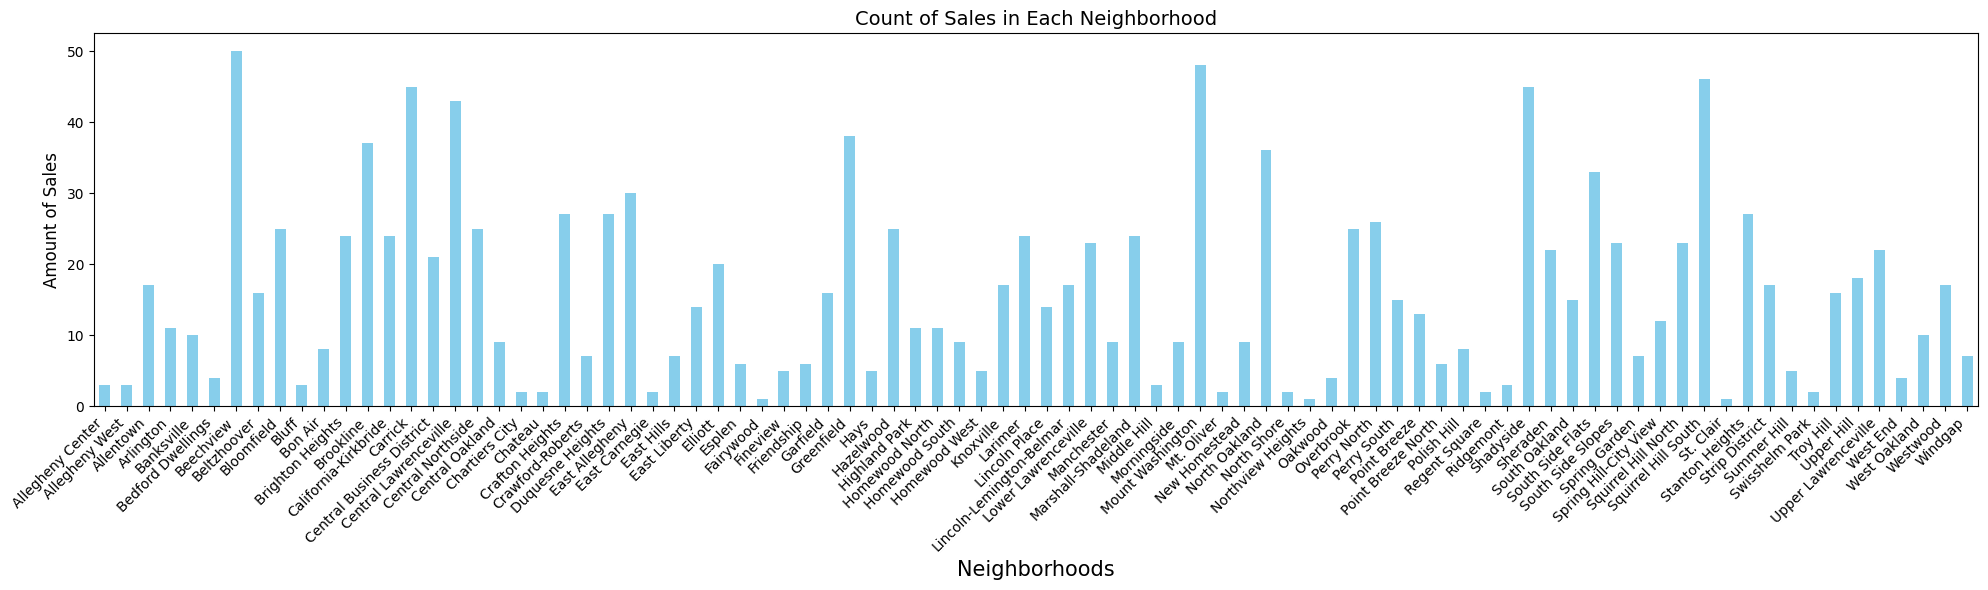

In [25]:
#Make it a graph :)
neighboor_count_sales=grouped

plt.figure(figsize=(20,6))
neighboor_count_sales.plot(kind='bar',color='skyblue')



#This is the labels for the chart

plt.title('Count of Sales in Each Neighborhood',fontsize=14)
plt.xlabel('Neighborhoods',fontsize=15)
plt.ylabel('Amount of Sales',fontsize=12)

plt.xticks(rotation=45,ha='right')


plt.tight_layout()
plt.show()




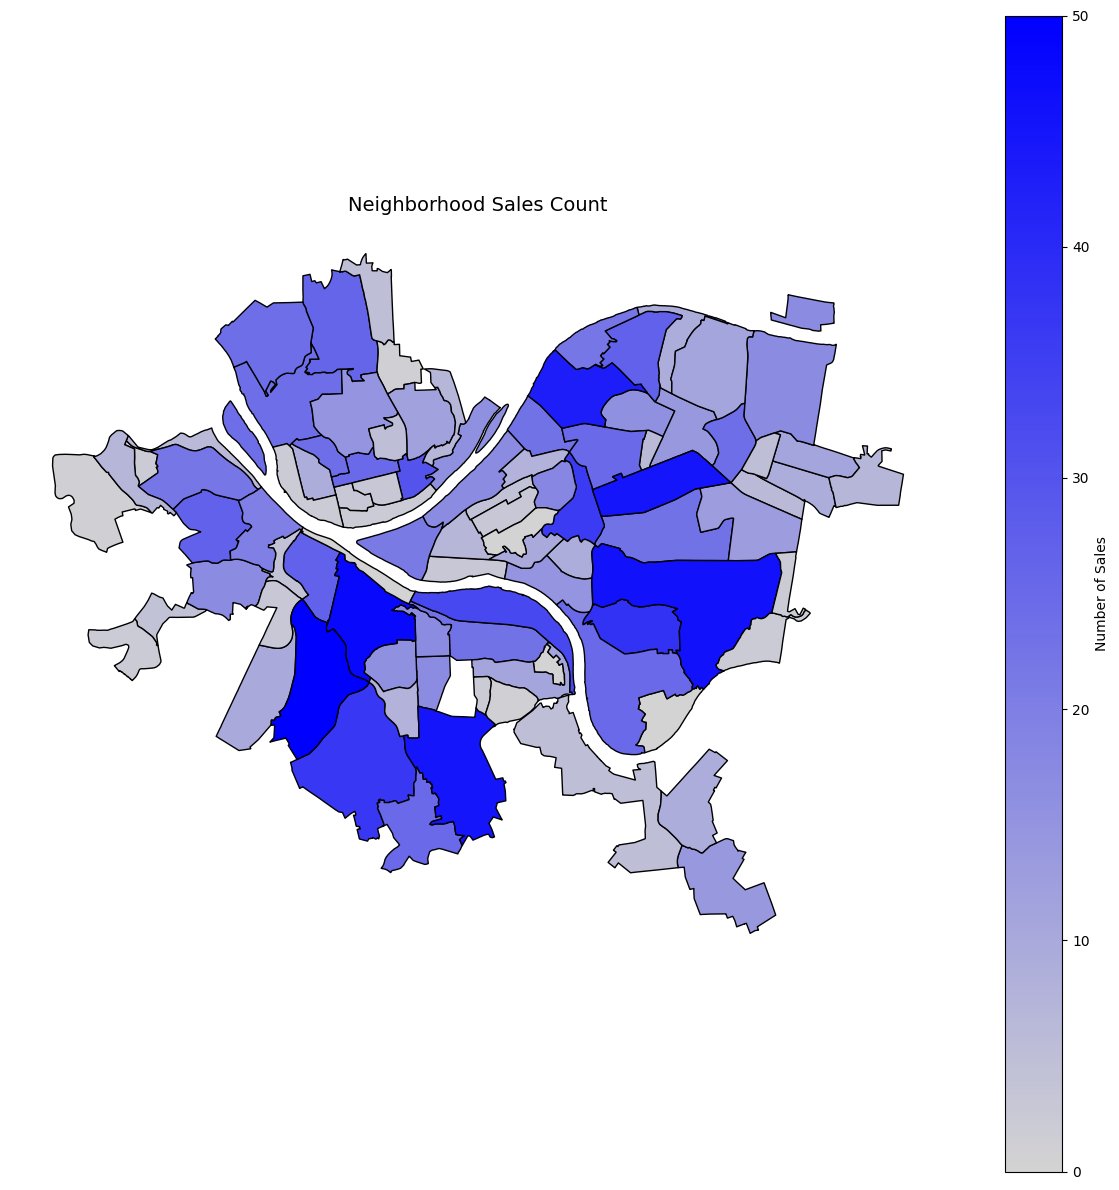

In [21]:
Sales_count_int = grouped
Sales_count_int.name = 'sale_count'


if 'sale_count' in gdf.columns:
    gdf = gdf.drop(columns='sale_count')




gdf = gdf.merge(Sales_count_int, how='left', left_on=name_col, right_index=True)

gdf['sale_count'] = gdf['sale_count'].fillna(0)





#Color


cmap = mcolors.LinearSegmentedColormap.from_list("count_gradient", ["lightgrey", "blue"])
norm = mcolors.Normalize(vmin=gdf['sale_count'].min(), vmax=gdf['sale_count'].max())



fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color=gdf['sale_count'].apply(lambda x: cmap(norm(x))), edgecolor='black')


#Do I want to see the labels of the neighboorhoods?
if show_labels:
    for idx, row in gdf.iterrows():
        point = row.geometry.representative_point()
        label = f"{row['hood'].title()}: {int(row['sale_count'])}"
        ax.text(point.x, point.y, label, fontsize=7, ha='center', color='blue')



#I do need the color bar here
sm=plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])
fig.colorbar(sm,ax=ax,label='Number of Sales')
plt.title("Neighborhood Sales Count", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


